In [21]:
#installing all required libraries.
import os 
import warnings
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from keras.utils import np_utils

In [22]:
#Loading the train and test data

exo_test = pd.read_csv('PlanetTest.csv')
exo_train= pd.read_csv('PlanetTrain.csv')

In [23]:
#summary of train data
exo_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [24]:
#Coverting labels into binary values for easy understanding.
categ = {2:1,1: 0}
exo_train.LABEL = [categ[item] for item in exo_train.LABEL]
exo_test.LABEL = [categ[item] for item in exo_test.LABEL]


In [25]:
#Describing the data after conversion.
exo_train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [26]:
#Finding counts for 1 and 0.Where 0 show presence of non-exoplanet and 1 Shows presence of exoplanet.
exo_train['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

# DATA EXPLORATORY ANALYSIS


c:\python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

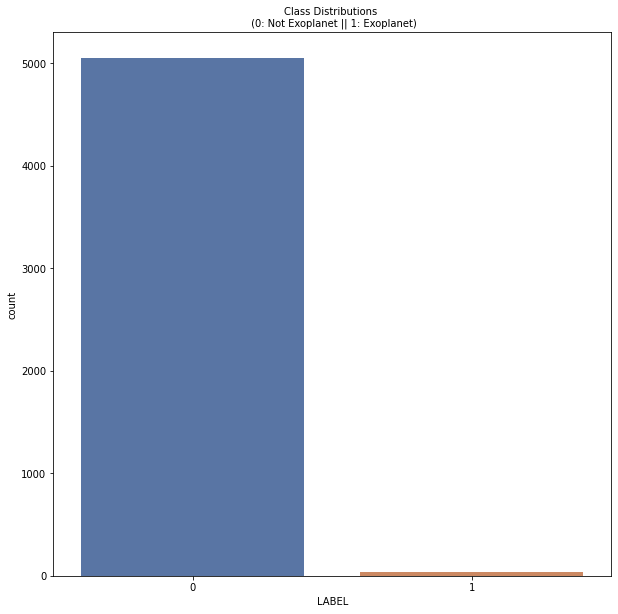

In [27]:
#Visualization of Data in the form of Graph
plt.figure(figsize=(10,10)) # it is used to set the size of the graphs.
colors = ["0", "1"]
sns.countplot('LABEL', data=exo_train, palette = 'deep') #it is used to show the counts of observation.
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=10)

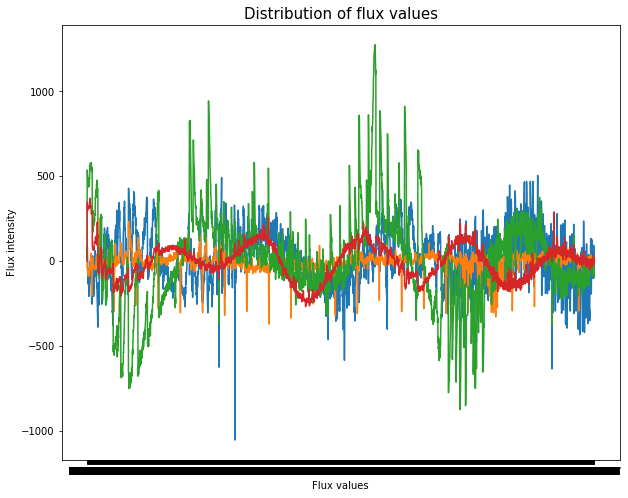

In [28]:
#Visualization of Patterns present in the Data.
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(exo_train.iloc[0,]) #iloc= integer index based which is used to specify rows and columns
plt.plot(exo_train.iloc[1,])
plt.plot(exo_train.iloc[2,])
plt.plot(exo_train.iloc[3,])
plt.show()

<AxesSubplot:>

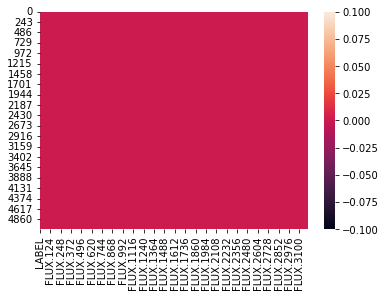

In [29]:
#plotting the heatmap.The Data has no null values.
sns.heatmap(exo_train.isnull())

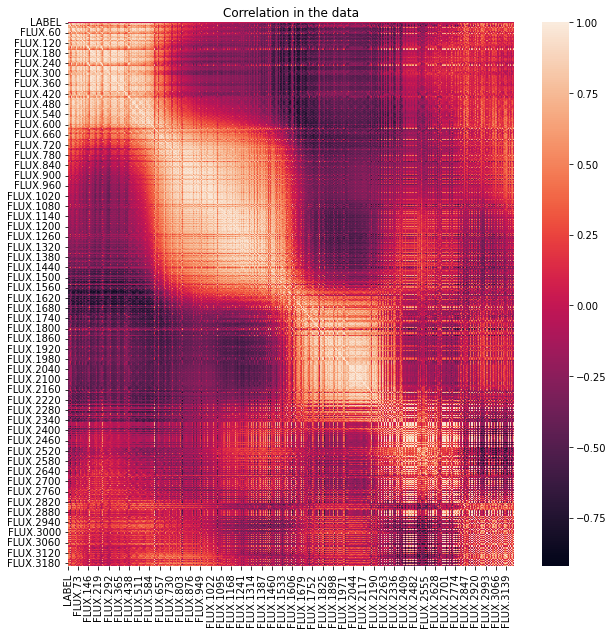

In [30]:
#Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(exo_train.corr())
plt.title('Correlation in the data')
plt.show()

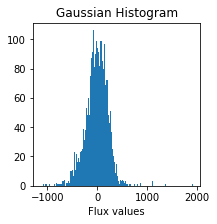

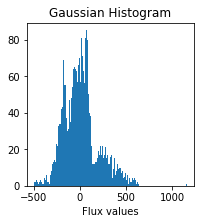

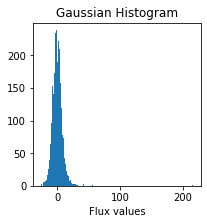

In [31]:
#Plotting gaussian histogram for non-exoplanets.
labels_1=[200,400,600]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(exo_train.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

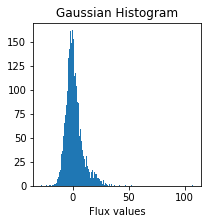

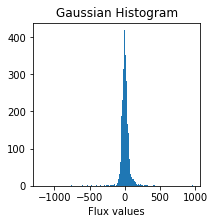

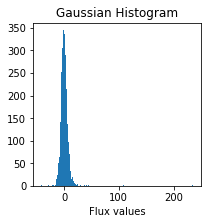

In [32]:
#plotting gaussian histogram for exoplanets.
labels_1=[15,30,45]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(exo_test.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

# RELATION BETWEEN VARIABLES


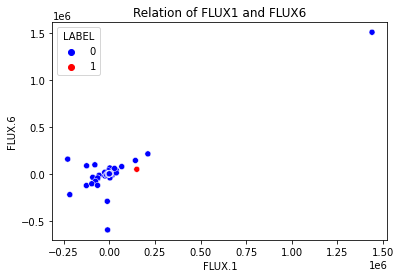

In [33]:
#Scatterplot.Plotting scatterplot for relationship between two columns
sns.scatterplot(data=exo_train, x='FLUX.1', y='FLUX.6', hue='LABEL', palette=['b','r'])
plt.title('Relation of FLUX1 and FLUX6')
plt.show()

Pairplot for random 5 intensities


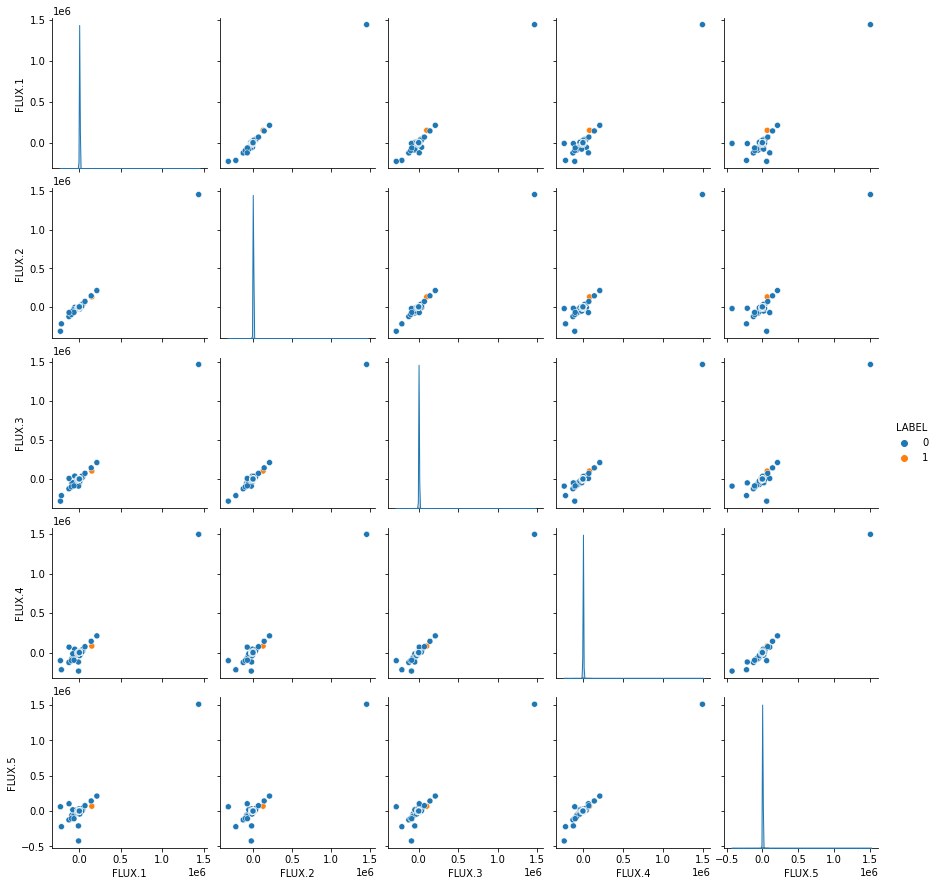

In [34]:
#Plotting of pairplot for random intensities of 5 columns.
print('Pairplot for random 5 intensities')
sns.pairplot(data=exo_train[['LABEL','FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']], hue='LABEL')
plt.show()

# Finding Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24032e7b0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24032e7b7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24030ccbcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24032e7bee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24032e7d2b0>],
 'means': []}

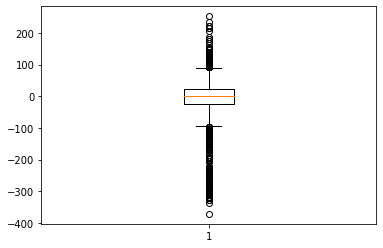

In [35]:
#Box plot for just single row of column FLUX1
plt.boxplot(list(exo_train.loc[1]))

<AxesSubplot:xlabel='LABEL', ylabel='FLUX.3'>

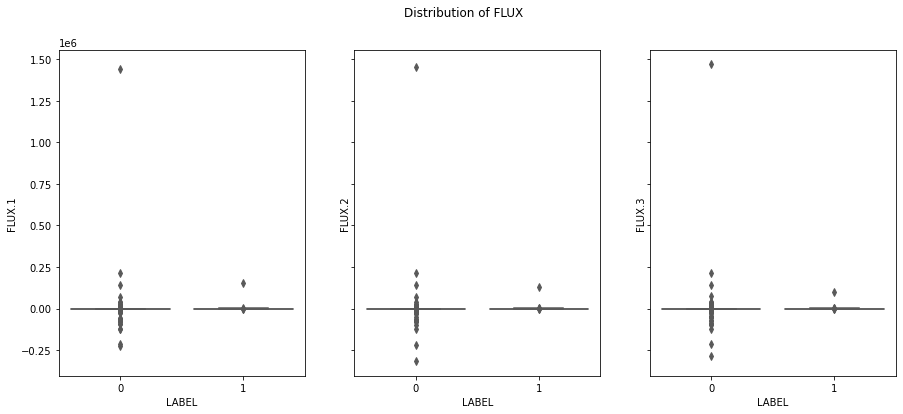

In [36]:
#Detecting outliers using boxplot for 3 columns FLUX1, FLUX2, FLux3
fig, axes = plt.subplots(1, 3,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=exo_train, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=exo_train, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=exo_train, x='LABEL', y='FLUX.3',palette="Set2")

In [37]:
#setting the right range of variables by dropping the outliers.
print('Dropping Outliers')
exo_train.drop(exo_train[exo_train['FLUX.1']>250000].index, axis=0, inplace=True)
exo_train.drop(exo_train[exo_train['FLUX.2']>250000].index, axis=0, inplace=True)
exo_train.drop(exo_train[exo_train['FLUX.3']>250000].index, axis=0, inplace=True)

Dropping Outliers


In [38]:
x_train = exo_train.drop(["LABEL"],axis=1)
y_train = exo_train["LABEL"]   
x_test = exo_test.drop(["LABEL"],axis=1)
y_test = exo_test["LABEL"]

# Data Normalization and Standardization

In [39]:
#Data Normalization
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

In [40]:
#standardization of the Data for consistent values.
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

# Experiement 1: Execution and Evaluation of Model without SMOTE

In [41]:
#Importing the required libraries of models.
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix

Accuracy of Naive Bayes is 0.9719298245614035

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       565
           1       0.18      0.60      0.27         5

    accuracy                           0.97       570
   macro avg       0.59      0.79      0.63       570
weighted avg       0.99      0.97      0.98       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

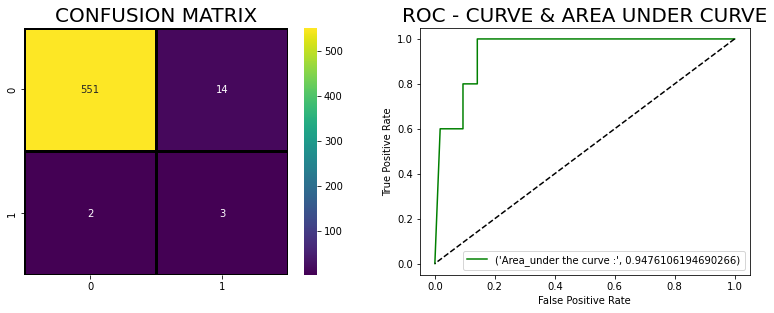

In [42]:
#Naive Bayes Without SMOTE Technique.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
prediction=classifier.predict(x_test)
print('Accuracy of Naive Bayes is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = classifier.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

Accuracy of Logistic Regression is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

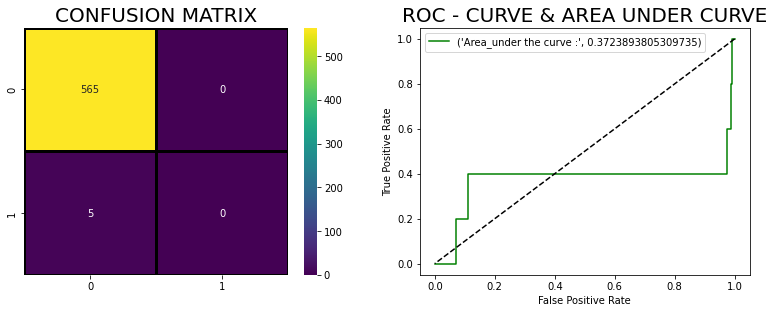

In [43]:
#Logistic Regression Without SMOTE Technique

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(x_train,y_train)

prediction=lr_model.predict(x_test)

print('Accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)


Validation accuracy of Decision Tree is 0.9894736842105263

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.33      0.20      0.25         5

    accuracy                           0.99       570
   macro avg       0.66      0.60      0.62       570
weighted avg       0.99      0.99      0.99       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

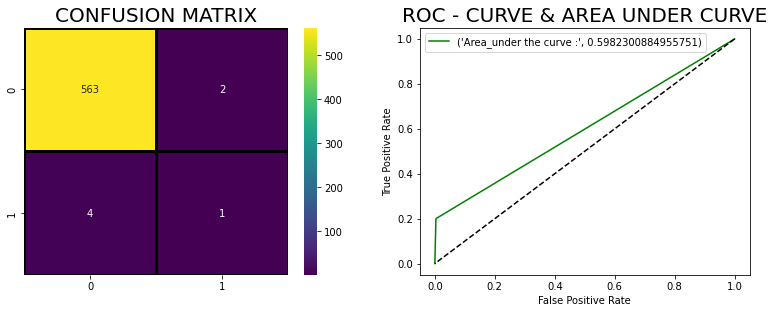

In [44]:
#Decision Tree Without SMOTE Technique
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

# Pre-processing Technique using SMOTE Technique.

<AxesSubplot:xlabel='index'>

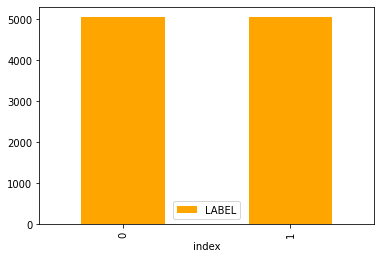

In [45]:
#SMOTE techinque for Balancing of the imbalanced Data.
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(exo_train.drop('LABEL',axis=1), exo_train['LABEL'])
ov_train_y = ov_train_y.astype('int')
ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL',color='orange')

In [46]:
#Splitting the dataset
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

# Experiement 2: Execution and Evaluation of Model with SMOTE

Accuracy of Naive Bayes is 0.48934893489348935

Classification report :
               precision    recall  f1-score   support

           0       0.53      0.04      0.07      1709
           1       0.49      0.97      0.65      1624

    accuracy                           0.49      3333
   macro avg       0.51      0.50      0.36      3333
weighted avg       0.51      0.49      0.35      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

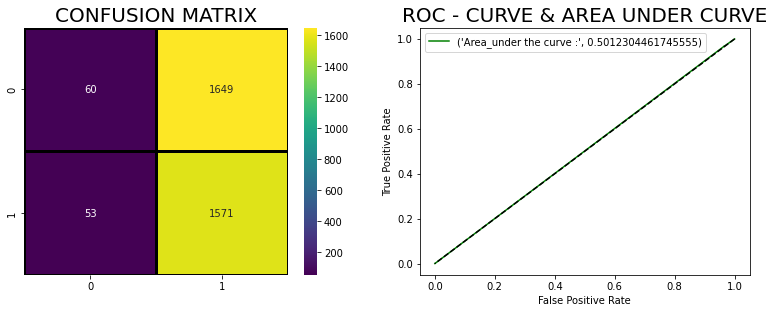

In [47]:
#NAIVE BAYES After SMOTE Technique
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_X,train_y)
prediction=classifier.predict(test_X)
print('Accuracy of Naive Bayes is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = classifier.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression is 0.6945694569456946

Classification report :
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      1709
           1       0.67      0.73      0.70      1624

    accuracy                           0.69      3333
   macro avg       0.70      0.70      0.69      3333
weighted avg       0.70      0.69      0.69      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

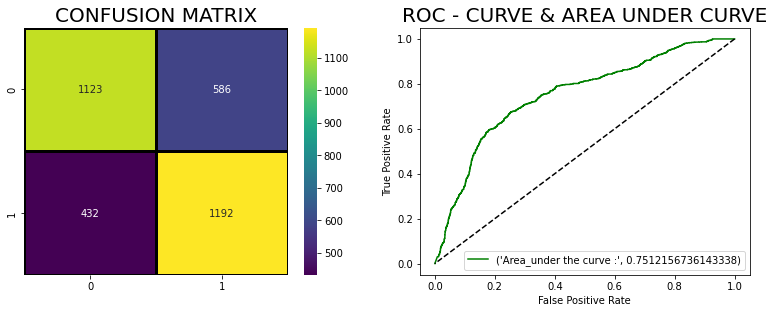

In [48]:
#Logistic Regression after SMOTE 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})
lr_model = lr_model.fit(train_X,train_y)
prediction= lr_model.predict(test_X)

print('Accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Decision Tree is 0.9366936693669367

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.89      0.94      1709
           1       0.90      0.99      0.94      1624

    accuracy                           0.94      3333
   macro avg       0.94      0.94      0.94      3333
weighted avg       0.94      0.94      0.94      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

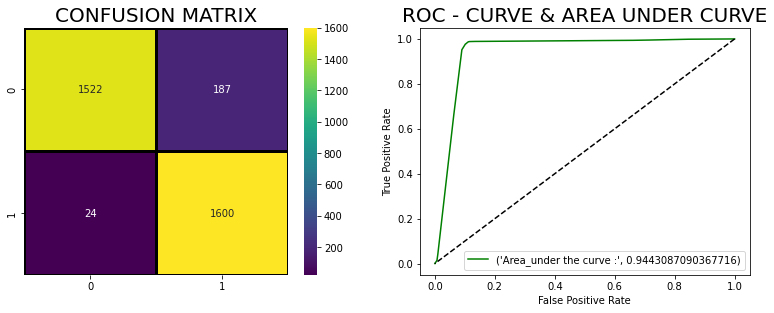

In [49]:
#Decision Tree After SMOTE Technique
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

prediction=ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "green")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)